# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name=r"C:\Users\Emeis\Documents\udacity\Value-based-methods\p1_navigation\Banana_Windows_x86_64\Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
from dqn_agentu import Agent

using cuda
Episode 100	Average Score: -0.20
eps: 0.9047921471137096
Episode 200	Average Score: 0.533
eps: 0.818648829478636
Episode 300	Average Score: 1.10
eps: 0.7407070321560997
Episode 400	Average Score: 1.96
eps: 0.6701859060067403
Episode 500	Average Score: 3.26
eps: 0.6063789448611848
Episode 600	Average Score: 3.57
eps: 0.5486469074854965
Episode 700	Average Score: 4.96
eps: 0.4964114134310989
Episode 800	Average Score: 5.72
eps: 0.4491491486100748
Episode 900	Average Score: 6.40
eps: 0.4063866225452039
Episode 1000	Average Score: 7.37
eps: 0.3676954247709635
Episode 1100	Average Score: 7.44
eps: 0.33268793286240766
Episode 1200	Average Score: 8.02
eps: 0.3010134290933992
Episode 1300	Average Score: 7.95
eps: 0.27235458681947705
Episode 1400	Average Score: 10.14
eps: 0.24642429138466176
Episode 1500	Average Score: 11.35
eps: 0.22296276370290227
Episode 1600	Average Score: 12.03
eps: 0.20173495769715546
Episode 1700	Average Score: 12.32
eps: 0.18252820552270246
Episode 1739	Avera

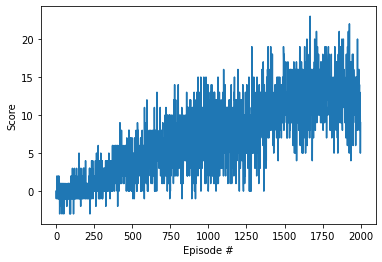

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
brain_name = env.brain_names[0]
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
action_size = brain.vector_action_space_size


# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)


agent = Agent(state_size=len(state), action_size=action_size, seed=0)#, method="ddqn", priority=True)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    o_mean = 0.0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]

        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            # convert action for unity
            #actions = {brain_name: action}
            actions = {brain_name: [action]}
            # send the action to the environment
            env_info = env.step(actions)[brain_name]        
            next_state = env_info.vector_observations[0]   
            # get the next state
            reward = env_info.rewards[0]                   
            # get the reward
            done = env_info.local_done[0]
          
            agent.step(state, action, reward, next_state, done)
            # see if episode has finished 
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        #if i_episode > 100:
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        s_mean = np.mean(scores_window)
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, s_mean))
            print('\reps:', eps)
        
        if s_mean >=13.0:
            if o_mean == 0:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, s_mean))
            if s_mean > o_mean:
                o_mean = s_mean
                print('\nSaving...')
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            #break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
import os
print(os.getcwd())
print(os.listdir())


In [3]:
# load the weights from file
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
brain_name = env.brain_names[0]
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
action_size = brain.vector_action_space_size

seed = 76
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)

agent = Agent(state_size=len(state), action_size=action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(100):
    score = 0
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    while True:
        action = agent.act(state, 0.1)
        #actions = action.astype(int)
        actions = {brain_name: [action]}
        #env.render()
        env_info = env.step(actions)[brain_name]        
        next_state = env_info.vector_observations[0]   
        reward = env_info.rewards[0] 
        score += reward    
        state = next_state               
        done = env_info.local_done[0]
        if done:
            break 
    print(score)            
#env.close()


15.0
20.0
18.0
16.0
15.0
19.0
20.0
6.0
12.0
5.0
17.0
12.0
10.0
18.0
18.0
4.0
18.0
12.0
17.0
10.0
12.0
9.0
15.0
8.0
15.0
14.0
15.0
13.0
20.0
10.0
14.0
11.0
10.0
10.0
11.0
10.0
16.0
9.0
18.0
18.0
13.0
11.0
16.0
11.0
13.0
14.0
15.0
12.0
13.0
10.0
18.0
15.0
12.0
14.0
14.0
19.0
11.0
13.0
11.0
17.0
11.0
20.0
22.0
16.0
14.0
16.0
13.0
13.0
12.0
16.0
15.0
15.0
20.0
15.0
15.0
7.0
14.0
13.0
8.0
15.0
11.0
17.0
12.0
14.0
11.0
10.0
10.0
10.0
15.0
13.0
19.0
17.0
13.0
16.0
16.0
21.0
14.0
15.0
7.0
15.0
